In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import re
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

In [30]:
data = pd.read_csv('/Users/wangxinyu/Downloads/CS 250/sephora_website_dataset.csv') 
data.head(5)

,id,brand,category,name,size,rating,number_of_reviews,love,price,value_price,...,MarketingFlags,MarketingFlags_content,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer
0,2218774,Acqua Di Parma,Fragrance,Blu Mediterraneo MINIATURE Set,5 x 0.16oz/5mL,4.0,4,3002,66.0,75.0,...,True,online only,no options,This enchanting set comes in a specially handc...,Suggested Usage:-Fragrance is intensified by t...,Arancia di Capri Eau de Toilette: Alcohol Dena...,1,0,0,0
1,2044816,Acqua Di Parma,Cologne,Colonia,0.7 oz/ 20 mL,4.5,76,2700,66.0,66.0,...,True,online only,- 0.7 oz/ 20 mL Spray - 1.7 oz/ 50 mL Eau d...,An elegant timeless scent filled with a fresh-...,no instructions,unknown,1,0,0,0
2,1417567,Acqua Di Parma,Perfume,Arancia di Capri,5 oz/ 148 mL,4.5,26,2600,180.0,180.0,...,True,online only,- 1oz/30mL Eau de Toilette - 2.5 oz/ 74 mL E...,Fragrance Family: Fresh Scent Type: Fresh Citr...,no instructions,Alcohol Denat.- Water- Fragrance- Limonene- Li...,1,0,0,0
3,1417617,Acqua Di Parma,Perfume,Mirto di Panarea,2.5 oz/ 74 mL,4.5,23,2900,120.0,120.0,...,True,online only,- 1 oz/ 30 mL Eau de Toilette Spray - 2.5 oz/...,Panarea near Sicily is an an island suspended ...,no instructions,unknown,1,0,0,0
4,2218766,Acqua Di Parma,Fragrance,Colonia Miniature Set,5 x 0.16oz/5mL,3.5,2,943,72.0,80.0,...,True,online only,no options,The Colonia Miniature Set comes in an iconic A...,Suggested Usage:-Fragrance is intensified by t...,Colonia: Alcohol Denat.- Water- Fragrance- Lim...,1,0,0,0


In [31]:
data.shape

(9168, 21)

In [32]:
data.describe()

,id,rating,number_of_reviews,love,price,value_price,online_only,exclusive,limited_edition,limited_time_offer
count,9.168000e+03,9168.000000,9168.000000,9.168000e+03,9168.000000,9168.00000,9168.000000,9168.000000,9168.000000,9168.000000
mean,1.962952e+06,3.990020,282.139180,1.627859e+04,50.063237,51.82359,0.234839,0.264725,0.091841,0.000327
std,3.859714e+05,1.007707,890.642028,4.260651e+04,47.164989,49.45902,0.423921,0.441211,0.288817,0.018087
min,5.000000e+01,0.000000,0.000000,0.000000e+00,2.000000,2.00000,0.000000,0.000000,0.000000,0.000000
25%,1.819453e+06,4.000000,10.000000,1.600000e+03,24.000000,25.00000,0.000000,0.000000,0.000000,0.000000
50%,2.072354e+06,4.000000,46.000000,4.800000e+03,35.000000,35.00000,0.000000,0.000000,0.000000,0.000000
75%,2.230591e+06,4.500000,210.000000,1.380000e+04,59.000000,60.00000,0.000000,1.000000,0.000000,0.000000
max,2.359685e+06,5.000000,19000.000000,1.300000e+06,549.000000,549.00000,1.000000,1.000000,1.000000,1.000000


In [33]:
data = data.drop(['id','brand','name','size','URL','MarketingFlags','MarketingFlags_content','options','details','how_to_use','ingredients'],axis=1)
data.head(20)

,category,rating,number_of_reviews,love,price,value_price,online_only,exclusive,limited_edition,limited_time_offer
0,Fragrance,4.0,4,3002,66.0,75.0,1,0,0,0
1,Cologne,4.5,76,2700,66.0,66.0,1,0,0,0
2,Perfume,4.5,26,2600,180.0,180.0,1,0,0,0
3,Perfume,4.5,23,2900,120.0,120.0,1,0,0,0
4,Fragrance,3.5,2,943,72.0,80.0,1,0,0,0
5,Perfume,4.5,79,2600,180.0,180.0,1,0,0,0
6,Perfume,4.5,79,5000,210.0,210.0,1,0,0,0
7,Cologne,5.0,13,719,120.0,120.0,1,0,0,0
8,Body Mist & Hair Mist,4.0,5,800,58.0,58.0,1,0,0,0
9,Perfume,3.0,5,2100,58.0,58.0,1,1,0,0


In [34]:
for field in range(0,len(data.dtypes)):
    if data.dtypes[field]=='object':
        uniquelabels = data.iloc[:,field].unique()
        cleanup_nums = dict(zip(uniquelabels,range(len(uniquelabels))))
        data.replace(cleanup_nums, inplace=True)
data.head(20)

,category,rating,number_of_reviews,love,price,value_price,online_only,exclusive,limited_edition,limited_time_offer
0,0,4.0,4,3002,66.0,75.0,1,0,0,0
1,1,4.5,76,2700,66.0,66.0,1,0,0,0
2,2,4.5,26,2600,180.0,180.0,1,0,0,0
3,2,4.5,23,2900,120.0,120.0,1,0,0,0
4,0,3.5,2,943,72.0,80.0,1,0,0,0
5,2,4.5,79,2600,180.0,180.0,1,0,0,0
6,2,4.5,79,5000,210.0,210.0,1,0,0,0
7,1,5.0,13,719,120.0,120.0,1,0,0,0
8,3,4.0,5,800,58.0,58.0,1,0,0,0
9,2,3.0,5,2100,58.0,58.0,1,1,0,0


In [35]:
data.isnull().sum()

category              0
rating                0
number_of_reviews     0
love                  0
price                 0
value_price           0
online_only           0
exclusive             0
limited_edition       0
limited_time_offer    0
dtype: int64

# Visualization

Text(0.5, 1.0, 'Rating Distribution')

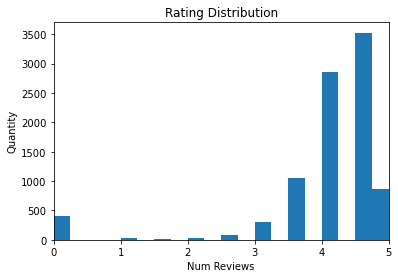

In [36]:
#setting the axes
axes = plt.axes()
axes.set_xlim([0,(data['rating'].max())])
#making histogram with 20 bins
plt.hist('rating', data = data, bins = 20)
plt.xlabel('Num Reviews')
plt.ylabel('Quantity')
plt.title('Rating Distribution')

Text(0.5, 1.0, 'Reviews Distribution')

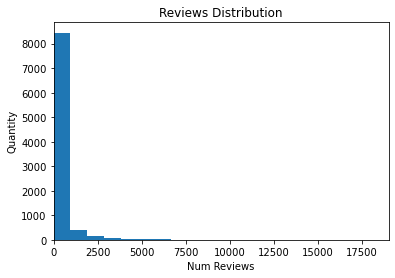

In [37]:
#setting the axes
axes = plt.axes()
axes.set_xlim([0,(data['number_of_reviews'].max())])
#making histogram with 20 bins
plt.hist('number_of_reviews', data = data, bins = 20)
plt.xlabel('Num Reviews')
plt.ylabel('Quantity')
plt.title('Reviews Distribution')

Text(0.5, 1.0, 'Love Distribution')

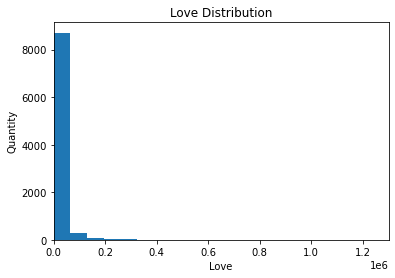

In [38]:
#setting the axes
axes = plt.axes()
axes.set_xlim([0,(data['love'].max())])
#making histogram with 20 bins
plt.hist('love', data = data, bins = 20)
plt.xlabel('Love')
plt.ylabel('Quantity')
plt.title('Love Distribution')

Text(0.5, 1.0, 'Price Distribution')

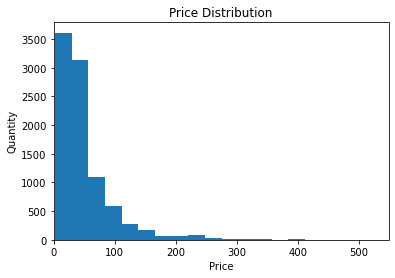

In [39]:
#setting the axes
axes = plt.axes()
axes.set_xlim([0,(data['price'].max())])
#making histogram with 20 bins
plt.hist('price', data = data, bins = 20)
plt.xlabel('Price')
plt.ylabel('Quantity')
plt.title('Price Distribution')

Text(0.5, 1.0, 'Value Price Distribution')

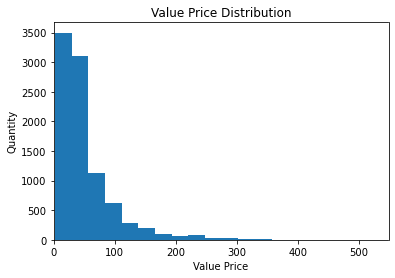

In [40]:
#setting the axes
axes = plt.axes()
axes.set_xlim([0,(data['value_price'].max())])
#making histogram with 20 bins
plt.hist('value_price', data = data, bins = 20)
plt.xlabel('Value Price')
plt.ylabel('Quantity')
plt.title('Value Price Distribution')

# Online Only

0    7015
1    2153
Name: online_only, dtype: int64


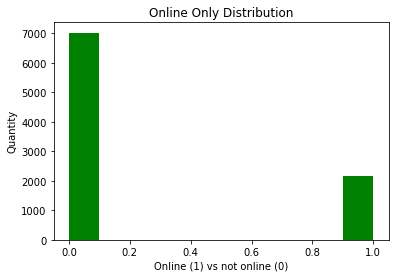

In [41]:
yhist = plt.hist('online_only', data = data, color='g')
plt.xlabel('Online (1) vs not online (0)')
plt.ylabel('Quantity')
plt.title('Online Only Distribution')
print(data.online_only.value_counts())

In [42]:
#importing module
import statsmodels.api as sm
#setting up X and y
cols= ['rating','number_of_reviews','love','price','value_price']
X= data[cols]
y = data['online_only']
#filling in the statsmodels Logit method
logit_model = sm.Logit(y,X)
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.496316
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:            online_only   No. Observations:                 9168
Model:                          Logit   Df Residuals:                     9163
Method:                           MLE   Df Model:                            4
Date:                Fri, 10 Dec 2021   Pseudo R-squ.:                 0.08942
Time:                        11:16:08   Log-Likelihood:                -4550.2
converged:                       True   LL-Null:                       -4997.1
Covariance Type:            nonrobust   LLR p-value:                3.821e-192
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
rating               -0.2227      0.010    -21.572      0.000      -0.243      -0.202
number_o

### Logistic Regression 

In [43]:
from sklearn.linear_model import LogisticRegression
#redefining columns
cols= ['category','rating','number_of_reviews','love','price','value_price']
X= data[cols]
y = data['online_only']
#Dividing into training(70%) and testing(30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, train_size=0.7,
                                                    random_state = 50)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6417, 6) (2751, 6) (6417,) (2751,)


In [44]:
#Running new regression on training data
logreg = LogisticRegression(random_state=50, solver='lbfgs',
                         multi_class='multinomial',max_iter=1000)
logreg.fit(X_train, y_train)
#Calculating the accuracy of the training model on the testing data
accuracy = logreg.score(X_test, y_test)
print('The accuracy is: ' + str(accuracy *100) + '%')

The accuracy is: 76.44492911668485%


                 Online only  Not online only
Online only           2021.0             78.0
Not online only        570.0             82.0


<AxesSubplot:>

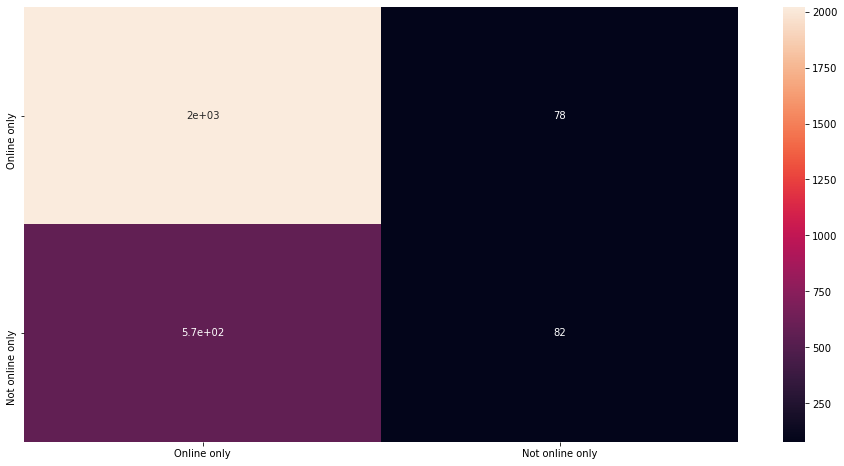

In [46]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

numClasses = 2
li = ['Online only','Not online only']
y_test = list(y_test)

conf = np.zeros([numClasses,numClasses])
guesses = logreg.predict(X_test)

for digit in range(len(y_test)):
    real = y_test[digit]
    guess = guesses[digit]
    conf[real,guess] = conf[real,guess] + 1
df_cm = pd.DataFrame(conf, index = [i for i in li],
                     columns = [i for i in li])
plt.figure(figsize = (16,8))
print(df_cm)
sn.heatmap(df_cm, annot=True)

### Random Forest

In [47]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=100, 
                               random_state=50, 
                               max_features = 'sqrt')
classifier.fit(X_train, y_train)
accuracy = classifier.score(X_test,y_test)
print('The accuracy is: ' + str(accuracy *100) + '%')

The accuracy is: 78.37150127226464%


                 Online only  Not online only
Online only           1931.0            168.0
Not online only        427.0            225.0


<AxesSubplot:>

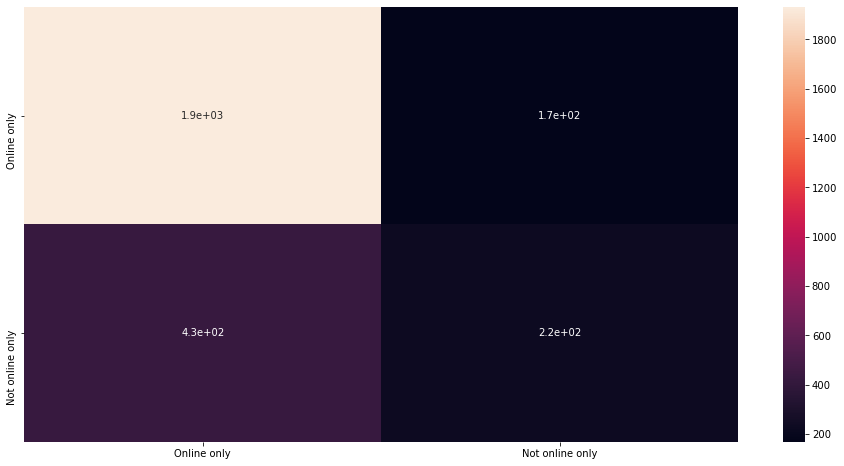

In [48]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

numClasses = 2
li = ['Online only','Not online only']
y_test = list(y_test)

conf = np.zeros([numClasses,numClasses])
guesses = classifier.predict(X_test)

for digit in range(len(y_test)):
    real = y_test[digit]
    guess = guesses[digit]
    conf[real,guess] = conf[real,guess] + 1
df_cm = pd.DataFrame(conf, index = [i for i in li],
                     columns = [i for i in li])
plt.figure(figsize = (16,8))
print(df_cm)
sn.heatmap(df_cm, annot=True)

# Limited Edition

0    8326
1     842
Name: limited_edition, dtype: int64


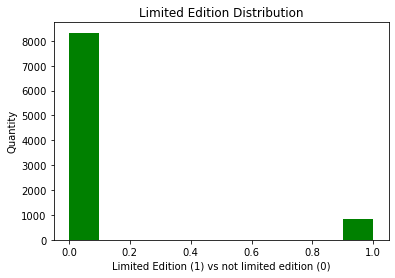

In [49]:
yhist = plt.hist('limited_edition', data = data, color='g')
plt.xlabel('Limited Edition (1) vs not limited edition (0)')
plt.ylabel('Quantity')
plt.title('Limited Edition Distribution')
print(data.limited_edition.value_counts())

In [50]:
#importing module
import statsmodels.api as sm
#setting up X and y
cols= ['rating','number_of_reviews','love','price','value_price']
X= data[cols]
y = data['limited_edition']
#filling in the statsmodels Logit method
logit_model = sm.Logit(y,X)
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.269759
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:        limited_edition   No. Observations:                 9168
Model:                          Logit   Df Residuals:                     9163
Method:                           MLE   Df Model:                            4
Date:                Fri, 10 Dec 2021   Pseudo R-squ.:                  0.1207
Time:                        11:17:16   Log-Likelihood:                -2473.1
converged:                       True   LL-Null:                       -2812.5
Covariance Type:            nonrobust   LLR p-value:                1.377e-145
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
rating               -0.4916      0.015    -32.327      0.000      -0.521      -0.462
number_o

### Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression
#redefining columns
cols= ['category','rating','number_of_reviews','love','price','value_price']
X= data[cols]
y = data['limited_edition']
#Dividing into training(70%) and testing(30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, train_size=0.7,
                                                    random_state = 50)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6417, 6) (2751, 6) (6417,) (2751,)


In [52]:
#Running new regression on training data
logreg = LogisticRegression(random_state=50, solver='lbfgs',
                         multi_class='multinomial',max_iter=1000)
logreg.fit(X_train, y_train)
#Calculating the accuracy of the training model on the testing data
accuracy = logreg.score(X_test, y_test)
print('The accuracy is: ' + str(accuracy *100) + '%')

The accuracy is: 91.20319883678663%


                     limited edition  not limited edition
limited edition               2466.0                 23.0
not limited edition            219.0                 43.0


<AxesSubplot:>

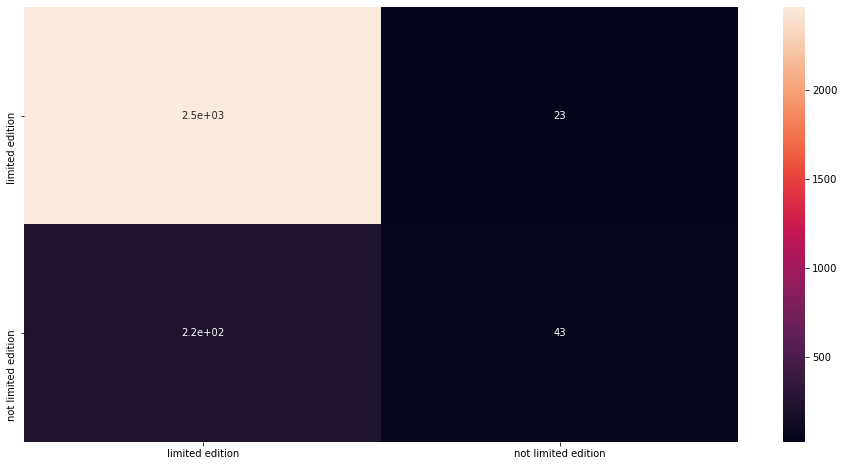

In [53]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

numClasses = 2
li = ['limited edition','not limited edition']
y_test = list(y_test)

conf = np.zeros([numClasses,numClasses])
guesses = logreg.predict(X_test)

for digit in range(len(y_test)):
    real = y_test[digit]
    guess = guesses[digit]
    conf[real,guess] = conf[real,guess] + 1
df_cm = pd.DataFrame(conf, index = [i for i in li],
                     columns = [i for i in li])
plt.figure(figsize = (16,8))
print(df_cm)
sn.heatmap(df_cm, annot=True)

### Random Forest

In [54]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=100, 
                               random_state=50, 
                               max_features = 'sqrt')
classifier.fit(X_train, y_train)
accuracy = classifier.score(X_test,y_test)
print('The accuracy is: ' + str(accuracy *100) + '%')

The accuracy is: 92.00290803344238%


                 Limited Edition  Non Limited
Limited Edition           2461.0         28.0
Non Limited                192.0         70.0


<AxesSubplot:>

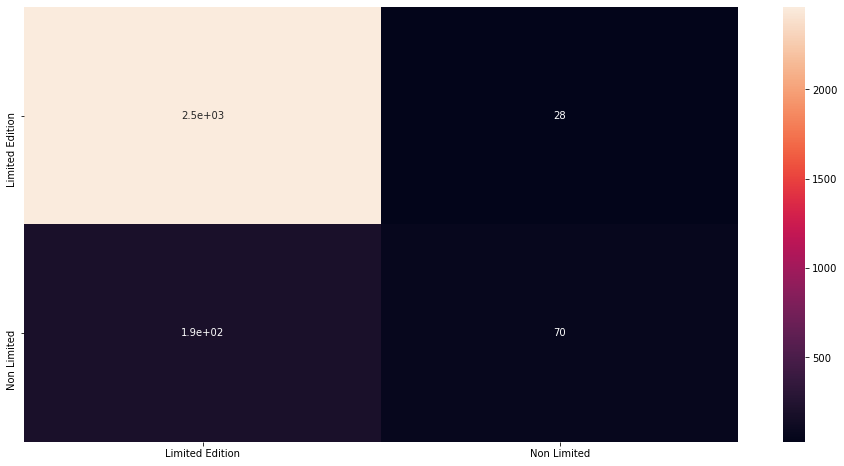

In [55]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

numClasses = 2
li = ['Limited Edition','Non Limited']
y_test = list(y_test)

conf = np.zeros([numClasses,numClasses])
guesses = classifier.predict(X_test)

for digit in range(len(y_test)):
    real = y_test[digit]
    guess = guesses[digit]
    conf[real,guess] = conf[real,guess] + 1
df_cm = pd.DataFrame(conf, index = [i for i in li],
                     columns = [i for i in li])
plt.figure(figsize = (16,8))
print(df_cm)
sn.heatmap(df_cm, annot=True)

# Exclusive

0    6741
1    2427
Name: exclusive, dtype: int64


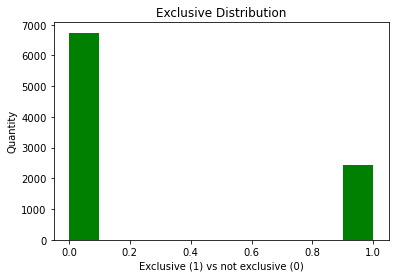

In [56]:
yhist = plt.hist('exclusive', data = data, color='g')
plt.xlabel('Exclusive (1) vs not exclusive (0)')
plt.ylabel('Quantity')
plt.title('Exclusive Distribution')
print(data.exclusive.value_counts())

In [57]:
#importing module
import statsmodels.api as sm
#setting up X and y
cols= ['rating','number_of_reviews','love','price','value_price']
X= data[cols]
y = data['exclusive']
#filling in the statsmodels Logit method
logit_model = sm.Logit(y,X)
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.549421
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              exclusive   No. Observations:                 9168
Model:                          Logit   Df Residuals:                     9163
Method:                           MLE   Df Model:                            4
Date:                Fri, 10 Dec 2021   Pseudo R-squ.:                 0.04935
Time:                        11:18:22   Log-Likelihood:                -5037.1
converged:                       True   LL-Null:                       -5298.6
Covariance Type:            nonrobust   LLR p-value:                7.242e-112
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
rating               -0.0748      0.010     -7.211      0.000      -0.095      -0.054
number_o

### Logistic Regression 

In [58]:
from sklearn.linear_model import LogisticRegression
#redefining columns
cols= ['category','rating','number_of_reviews','love','price','value_price']
X= data[cols]
y = data['exclusive']
#Dividing into training(70%) and testing(30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, train_size=0.7,
                                                    random_state = 50)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6417, 6) (2751, 6) (6417,) (2751,)


In [59]:
#Running new regression on training data
logreg = LogisticRegression(random_state=50, solver='lbfgs',
                         multi_class='multinomial',max_iter=1000)
logreg.fit(X_train, y_train)
#Calculating the accuracy of the training model on the testing data
accuracy = logreg.score(X_test, y_test)
print('The accuracy is: ' + str(accuracy *100) + '%')

The accuracy is: 73.2460923300618%


               Exclusive  Not exclusive
Exclusive         1997.0           19.0
Not exclusive      717.0           18.0


<AxesSubplot:>

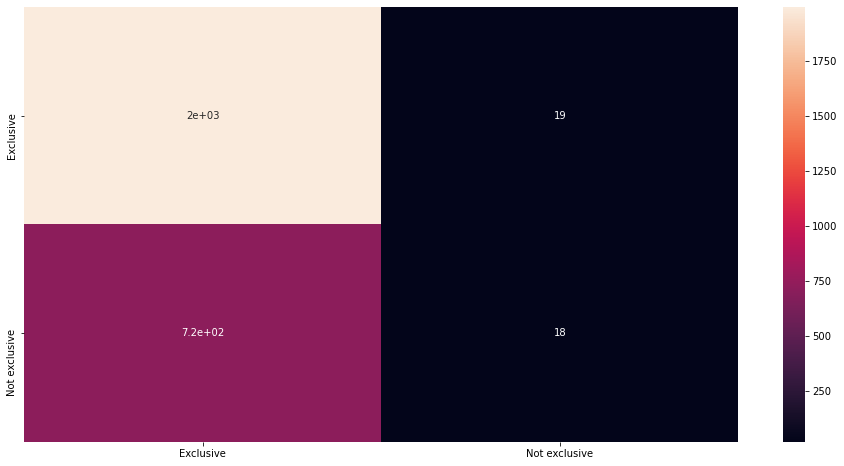

In [60]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

numClasses = 2
li = ['Exclusive','Not exclusive']
y_test = list(y_test)

conf = np.zeros([numClasses,numClasses])
guesses = logreg.predict(X_test)

for digit in range(len(y_test)):
    real = y_test[digit]
    guess = guesses[digit]
    conf[real,guess] = conf[real,guess] + 1
df_cm = pd.DataFrame(conf, index = [i for i in li],
                     columns = [i for i in li])
plt.figure(figsize = (16,8))
print(df_cm)
sn.heatmap(df_cm, annot=True)

### Random Forest

In [61]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=100, 
                               random_state=50, 
                               max_features = 'sqrt')
classifier.fit(X_train, y_train)
accuracy = classifier.score(X_test,y_test)
print('The accuracy is: ' + str(accuracy *100) + '%')

The accuracy is: 76.88113413304252%


               Exclsuive  Not Exclusive
Exclsuive         1868.0          148.0
Not Exclusive      488.0          247.0


<AxesSubplot:>

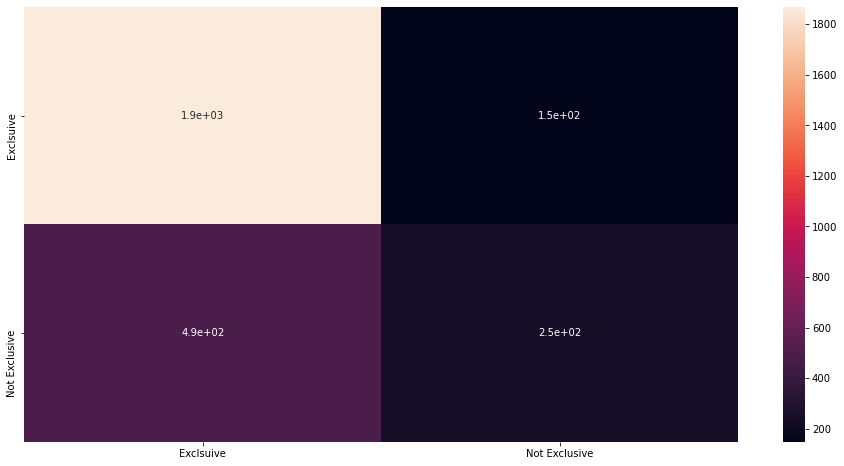

In [62]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

numClasses = 2
li = ['Exclsuive','Not Exclusive']
y_test = list(y_test)

conf = np.zeros([numClasses,numClasses])
guesses = classifier.predict(X_test)

for digit in range(len(y_test)):
    real = y_test[digit]
    guess = guesses[digit]
    conf[real,guess] = conf[real,guess] + 1
df_cm = pd.DataFrame(conf, index = [i for i in li],
                     columns = [i for i in li])
plt.figure(figsize = (16,8))
print(df_cm)
sn.heatmap(df_cm, annot=True)

# Limited Time Offer (DROPPED)

0    9165
1       3
Name: limited_time_offer, dtype: int64


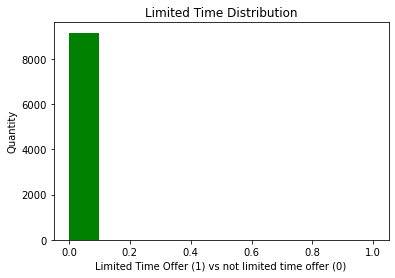

In [63]:
yhist = plt.hist('limited_time_offer', data = data, color='g')
plt.xlabel('Limited Time Offer (1) vs not limited time offer (0)')
plt.ylabel('Quantity')
plt.title('Limited Time Distribution')
print(data.limited_time_offer.value_counts())

### Logistic Regression

In [64]:
from sklearn.linear_model import LogisticRegression
#redefining columns
cols= ['category','rating','number_of_reviews','love','price','value_price']
X= data[cols]
y = data['limited_time_offer']
#Dividing into training(70%) and testing(30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, train_size=0.7,
                                                    random_state = 50)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6417, 6) (2751, 6) (6417,) (2751,)


In [65]:
#Running new regression on training data
logreg = LogisticRegression(random_state=50, solver='lbfgs',
                         multi_class='multinomial',max_iter=1000)
logreg.fit(X_train, y_train)
#Calculating the accuracy of the training model on the testing data
accuracy = logreg.score(X_test, y_test)
print('The accuracy is: ' + str(accuracy *100) + '%')

The accuracy is: 99.96364958197019%


                        Limited time offer  Not limited time offer
Limited time offer                  2750.0                     0.0
Not limited time offer                 1.0                     0.0


<AxesSubplot:>

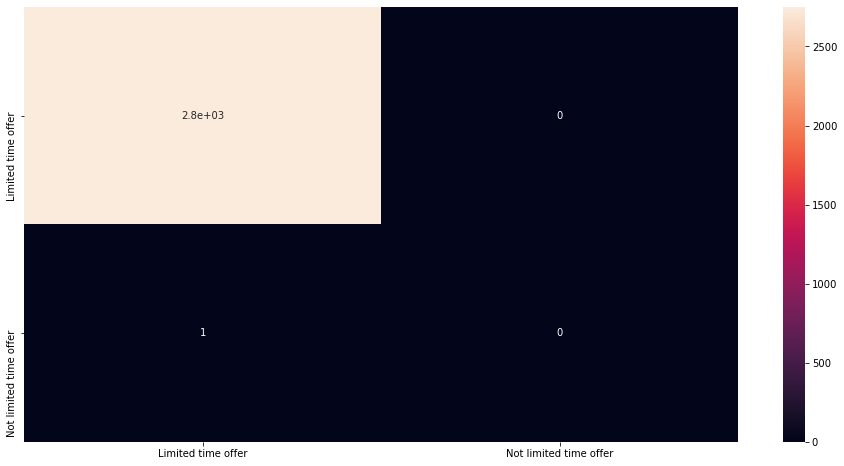

In [66]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

numClasses = 2
li = ['Limited time offer','Not limited time offer']
y_test = list(y_test)

conf = np.zeros([numClasses,numClasses])
guesses = logreg.predict(X_test)

for digit in range(len(y_test)):
    real = y_test[digit]
    guess = guesses[digit]
    conf[real,guess] = conf[real,guess] + 1
df_cm = pd.DataFrame(conf, index = [i for i in li],
                     columns = [i for i in li])
plt.figure(figsize = (16,8))
print(df_cm)
sn.heatmap(df_cm, annot=True)

this is due to the dataset above for limited time offer not having any products in this dataset have 1 signifying the product was a limited time offer, therefore there was a 99% accuracy because no product in this dataset was a limited timeedition product.


### Random Forest

In [67]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=100, 
                               random_state=50, 
                               max_features = 'sqrt')
classifier.fit(X_train, y_train)
accuracy = classifier.score(X_test,y_test)
print('The accuracy is: ' + str(accuracy *100) + '%')

The accuracy is: 99.96364958197019%


                        Limited time offer  Not limited time offer
Limited time offer                  2750.0                     0.0
Not limited time offer                 1.0                     0.0


<AxesSubplot:>

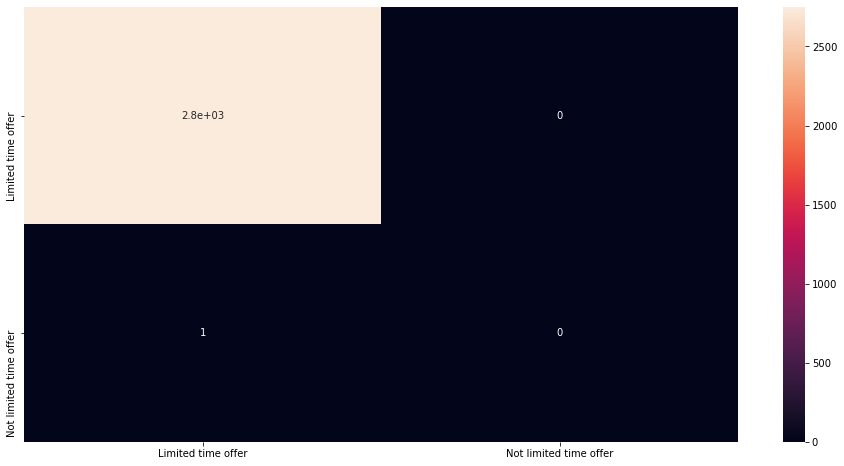

In [68]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

numClasses = 2
li = ['Limited time offer','Not limited time offer']
y_test = list(y_test)

conf = np.zeros([numClasses,numClasses])
guesses = classifier.predict(X_test)

for digit in range(len(y_test)):
    real = y_test[digit]
    guess = guesses[digit]
    conf[real,guess] = conf[real,guess] + 1
df_cm = pd.DataFrame(conf, index = [i for i in li],
                     columns = [i for i in li])
plt.figure(figsize = (16,8))
print(df_cm)
sn.heatmap(df_cm, annot=True)